# Exploring the Data

To-do:
- Incorporate expected daily price changes in terms of Levy distribution
- Market profile (approximated by Levy distribution with truncated tails), order flow

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from dataset import kline_data
from statsmodels.graphics import tsaplots
from PyEMD import CEEMDAN
from sklearn.preprocessing import MinMaxScaler

## Daily

In [2]:
btc = kline_data(interval='1d')
btc['d_oc'] = btc['close'] - btc['open']
btc['d_oc_p'] = (btc['close'] - btc['open']) / btc['open']
btc['d_hl'] = btc['high'] - btc['low']
btc['d_hl_p'] = (btc['high'] - btc['low']) / btc['open']
btc.tail()

Last saved data candle close time: 2021-08-04 00:00:00


,open_time,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,d_oc,d_oc_p,d_hl,d_hl_p
1443,2021-07-30 00:00:00,40018.49,42316.71,38313.23,42206.37,73602.784805,2021-07-31 00:00:00,2.939834e+09,1797012,37730.426862,1.509173e+09,0.0,2187.88,0.054672,4003.48,0.100041
1444,2021-07-31 00:00:00,42206.36,42448.00,41000.15,41461.83,44849.791012,2021-08-01 00:00:00,1.868286e+09,1565380,22844.245050,9.518879e+08,0.0,-744.53,-0.017640,1447.85,0.034304
1445,2021-08-01 00:00:00,41461.84,42599.00,39422.01,39845.44,53953.186326,2021-08-02 00:00:00,2.227567e+09,1603964,25796.753795,1.066580e+09,0.0,-1616.40,-0.038985,3176.99,0.076624
1446,2021-08-02 00:00:00,39850.27,40480.01,38690.00,39147.82,50837.351954,2021-08-03 00:00:00,2.010928e+09,1162878,24558.005343,9.715967e+08,0.0,-702.45,-0.017627,1790.01,0.044918
1447,2021-08-03 00:00:00,39146.86,39780.00,37642.03,38207.05,57117.435853,2021-08-04 00:00:00,2.195361e+09,1379871,27683.466598,1.064119e+09,0.0,-939.81,-0.024007,2137.97,0.054614


In [3]:
print(np.min(btc['d_oc_p']))
print(np.max(btc['d_oc_p']))

-0.3950530462860038
0.22583175110276116


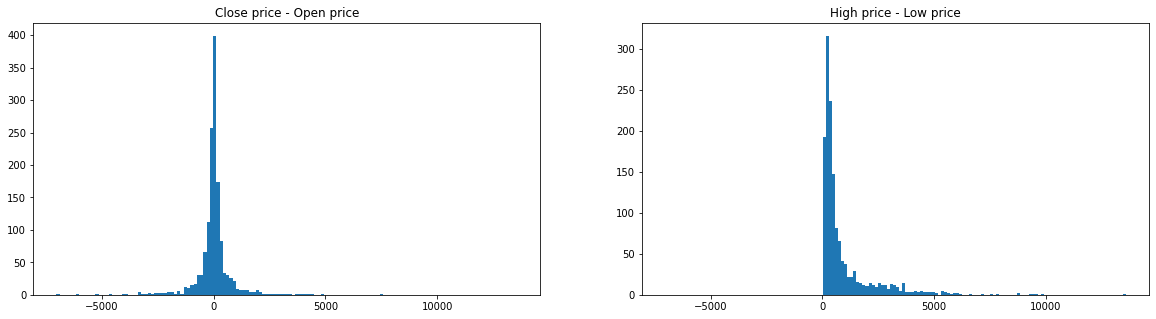

In [4]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(20, 5))
ax[0].hist(btc['d_oc'], bins=100)
ax[0].set_title('Close price - Open price')
ax[1].hist(btc['d_hl'], bins=100)
ax[1].set_title('High price - Low price')
plt.show()

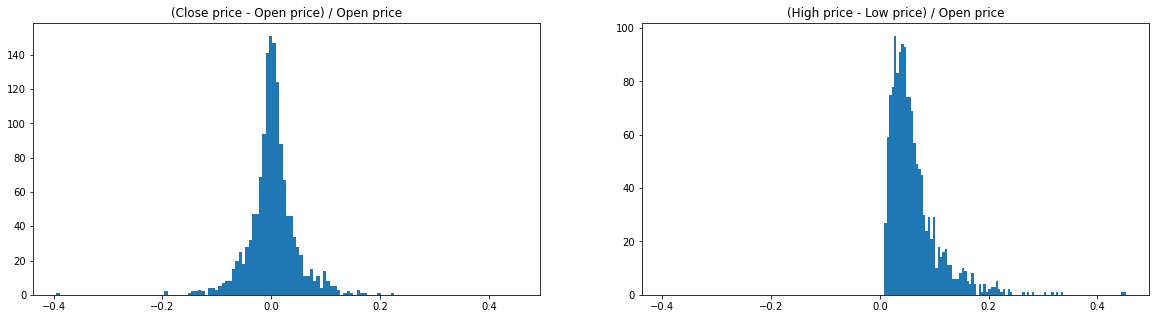

In [5]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(20, 5))
ax[0].hist(btc['d_oc_p'], bins=100)
ax[0].set_title('(Close price - Open price) / Open price')
ax[1].hist(btc['d_hl_p'], bins=100)
ax[1].set_title('(High price - Low price) / Open price')
plt.show()

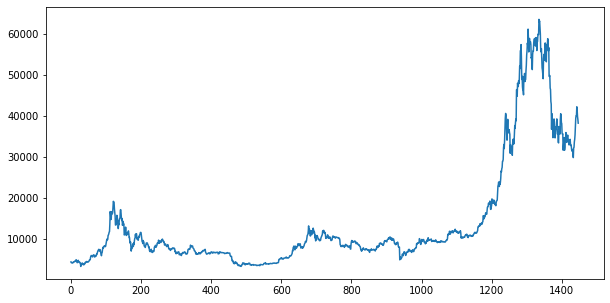

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(btc['close'])

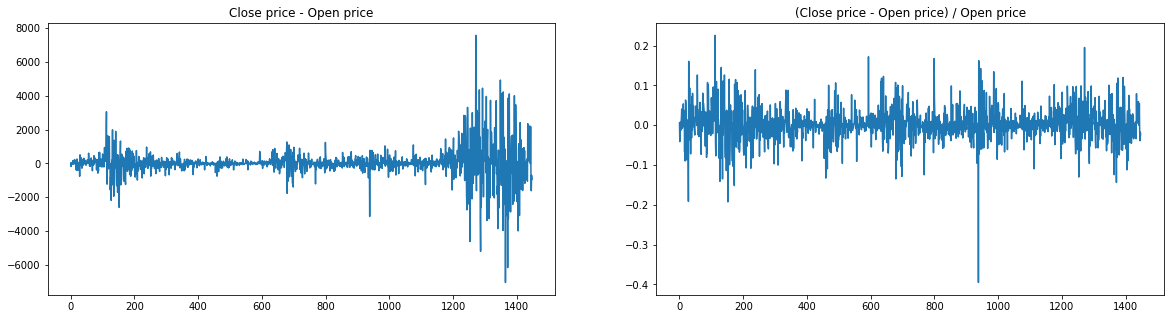

In [7]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(20, 5))
ax[0].plot(btc['d_oc'])
ax[0].set_title('Close price - Open price')
ax[1].plot(btc['d_oc_p'])
ax[1].set_title('(Close price - Open price) / Open price')
plt.show()

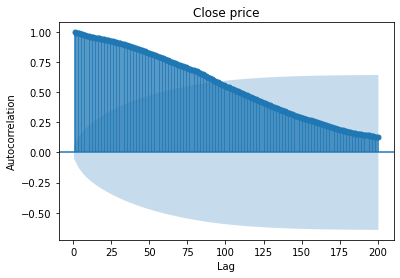

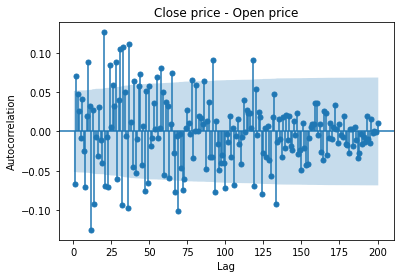

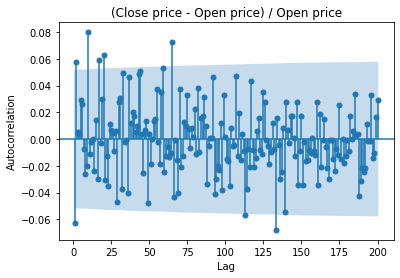

In [8]:
fig1 = tsaplots.plot_acf(btc['close'], lags=200, title='Close price', zero=False)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

fig = tsaplots.plot_acf(btc['d_oc'], lags=200, title='Close price - Open price', zero=False)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

fig = tsaplots.plot_acf(btc['d_oc_p'], lags=200, title='(Close price - Open price) / Open price', zero=False)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [9]:
data = btc['d_oc_p']
minmax = MinMaxScaler()
data_norm = minmax.fit_transform(np.expand_dims(data, axis=-1))

In [10]:
data_norm.shape

(1448, 1)

In [11]:
ceemdan = CEEMDAN()
imfs = ceemdan.ceemdan(np.squeeze(data_norm)).T

In [12]:
imfs.shape

(1448, 9)

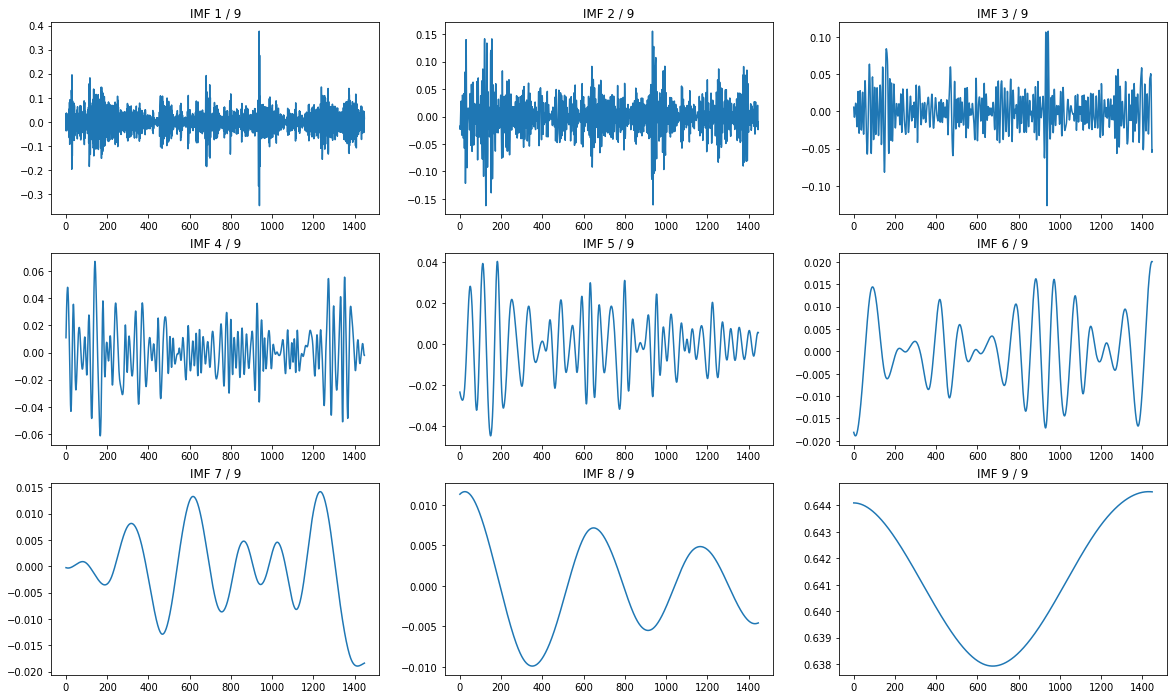

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(20, 12))
ct = 0
for i in range(3):
    for j in range(3):
        ax[i, j].plot(imfs[:, ct])
        ax[i, j].set_title(f'IMF {ct + 1} / 9')
        ct += 1

## 4H

In [14]:
btc = kline_data(interval='4h')
btc['d_oc'] = btc['close'] - btc['open']
btc['d_oc_p'] = (btc['close'] - btc['open']) / btc['open']
btc['d_hl'] = btc['high'] - btc['low']
btc['d_hl_p'] = (btc['high'] - btc['low']) / btc['open']
btc.tail()

No saved data exist.


,open_time,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,d_oc,d_oc_p,d_hl,d_hl_p
8668,2021-08-03 16:00:00,38169.45,38550.24,37642.03,38011.37,9155.330268,2021-08-03 20:00:00,3.490941e+08,233408,4490.572035,1.712726e+08,0.0,-158.08,-0.004142,908.21,0.023794
8669,2021-08-03 20:00:00,38008.80,38643.00,37870.00,38207.05,6071.641188,2021-08-04 00:00:00,2.323112e+08,183239,3028.634356,1.158985e+08,0.0,198.25,0.005216,773.00,0.020337
8670,2021-08-04 00:00:00,38207.04,38566.82,37890.54,37976.81,5603.620628,2021-08-04 04:00:00,2.141602e+08,128941,2768.159669,1.057951e+08,0.0,-230.23,-0.006026,676.28,0.017700
8671,2021-08-04 04:00:00,37976.82,38213.99,37674.18,37828.84,7233.662046,2021-08-04 08:00:00,2.741890e+08,133188,3851.288012,1.459639e+08,0.0,-147.98,-0.003897,539.81,0.014214
8672,2021-08-04 08:00:00,37828.84,38260.00,37508.56,38160.06,7663.712387,2021-08-04 12:00:00,2.903733e+08,147037,3913.443493,1.483031e+08,0.0,331.22,0.008756,751.44,0.019864


In [15]:
print(np.min(btc['d_oc_p']))
print(np.max(btc['d_oc_p']))

-0.20480825939154576
0.33407642202793547


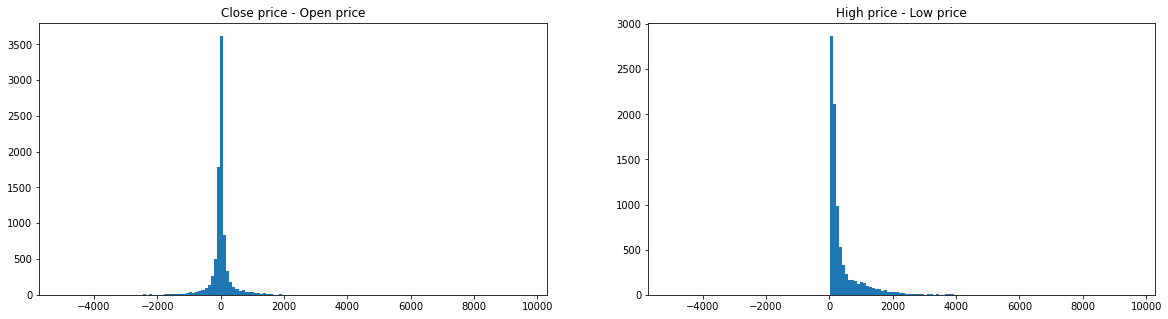

In [16]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(20, 5))
ax[0].hist(btc['d_oc'], bins=100)
ax[0].set_title('Close price - Open price')
ax[1].hist(btc['d_hl'], bins=100)
ax[1].set_title('High price - Low price')
plt.show()

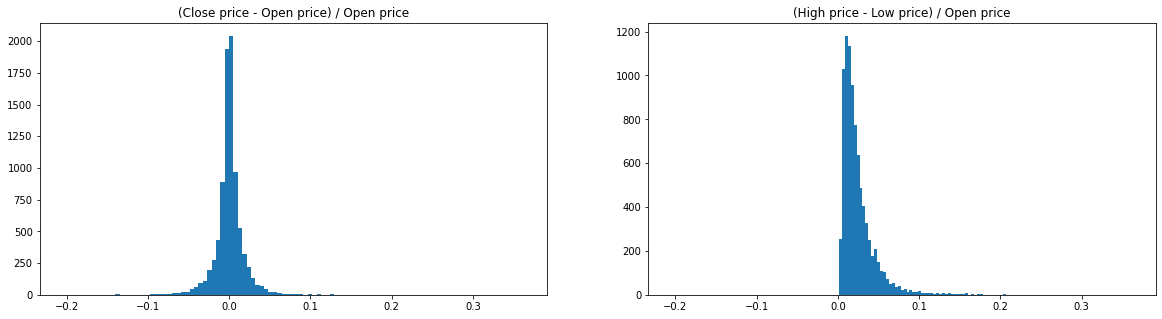

In [17]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(20, 5))
ax[0].hist(btc['d_oc_p'], bins=100)
ax[0].set_title('(Close price - Open price) / Open price')
ax[1].hist(btc['d_hl_p'], bins=100)
ax[1].set_title('(High price - Low price) / Open price')
plt.show()

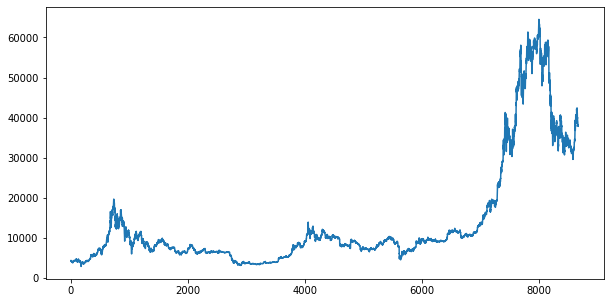

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(btc['close'])

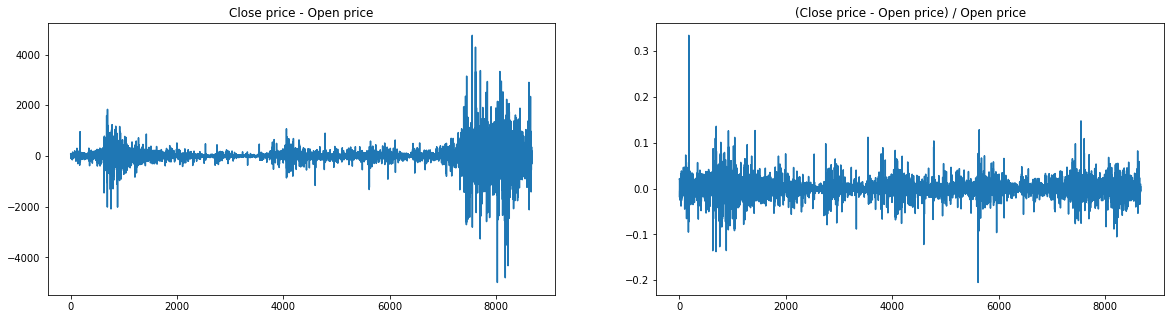

In [19]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(20, 5))
ax[0].plot(btc['d_oc'])
ax[0].set_title('Close price - Open price')
ax[1].plot(btc['d_oc_p'])
ax[1].set_title('(Close price - Open price) / Open price')
plt.show()

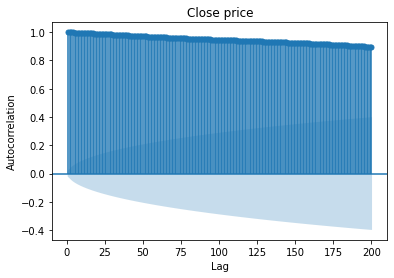

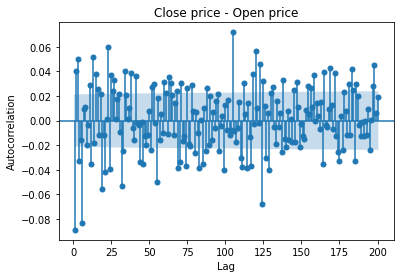

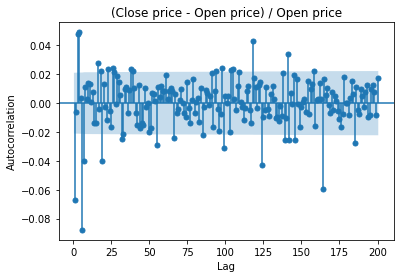

In [20]:
fig1 = tsaplots.plot_acf(btc['close'], lags=200, title='Close price', zero=False)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

fig = tsaplots.plot_acf(btc['d_oc'], lags=200, title='Close price - Open price', zero=False)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

fig = tsaplots.plot_acf(btc['d_oc_p'], lags=200, title='(Close price - Open price) / Open price', zero=False)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [21]:
data = btc['d_oc_p']
minmax = MinMaxScaler()
data_norm = minmax.fit_transform(np.expand_dims(data, axis=-1))

In [22]:
data_norm.shape

(8673, 1)

In [23]:
ceemdan = CEEMDAN()
imfs = ceemdan.ceemdan(np.squeeze(data_norm)).T

In [24]:
imfs.shape

(8673, 12)

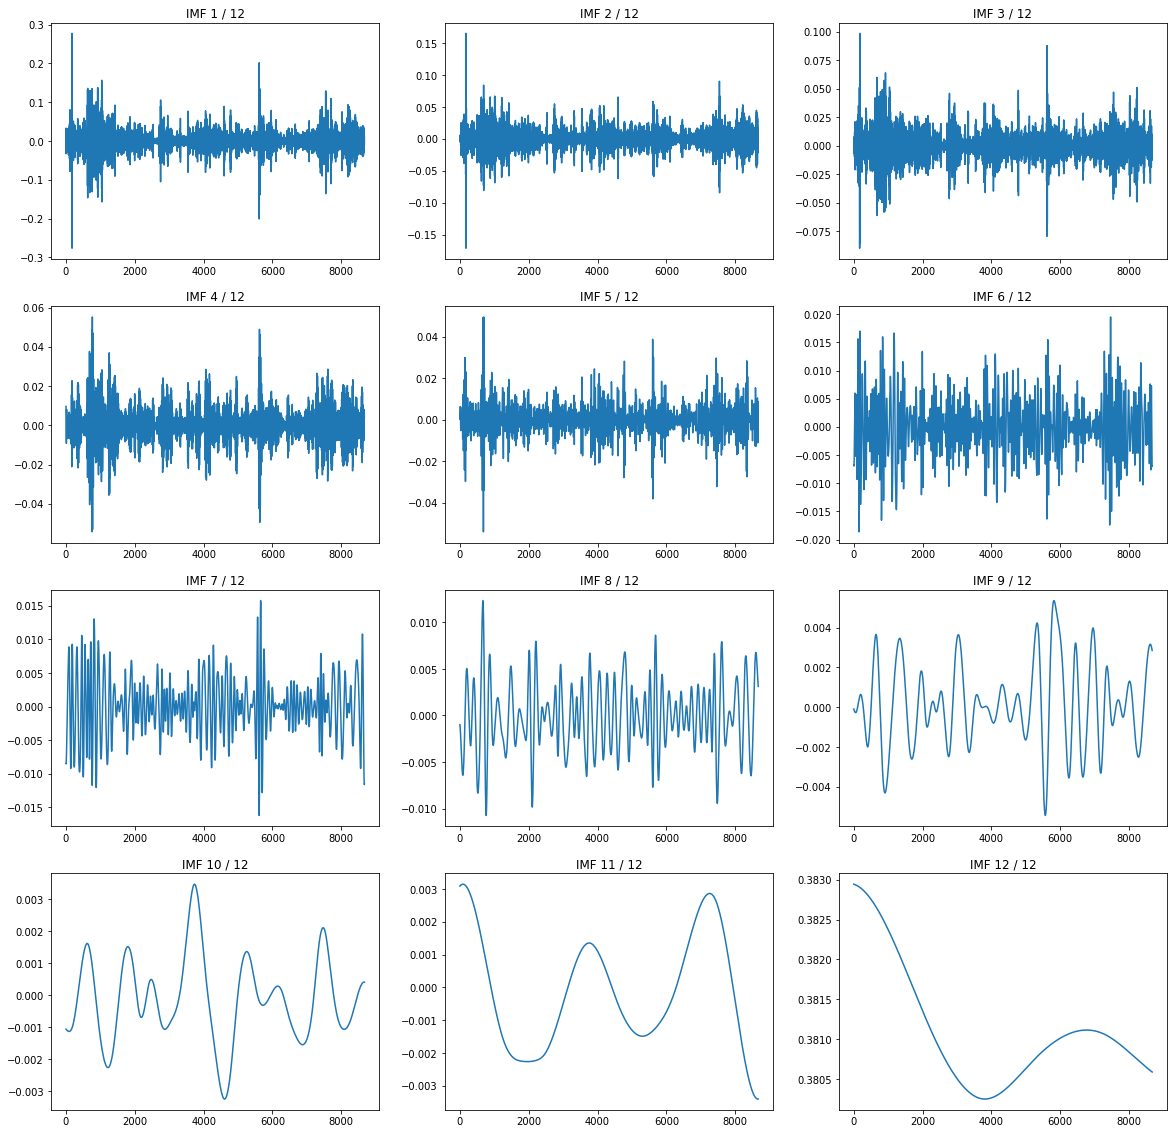

In [28]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
ct = 0
for i in range(4):
    for j in range(3):
        ax[i, j].plot(imfs[:, ct])
        ax[i, j].set_title(f'IMF {ct + 1} / {imfs.shape[1]}')
        ct += 1